# Titanic project

In [1]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [2]:
#lets load dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [5]:
#print columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#print first five rows 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#checking rows and columns
df.shape

(891, 12)

In [8]:
#checking datatype of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#  check null values and summing up columns wise
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

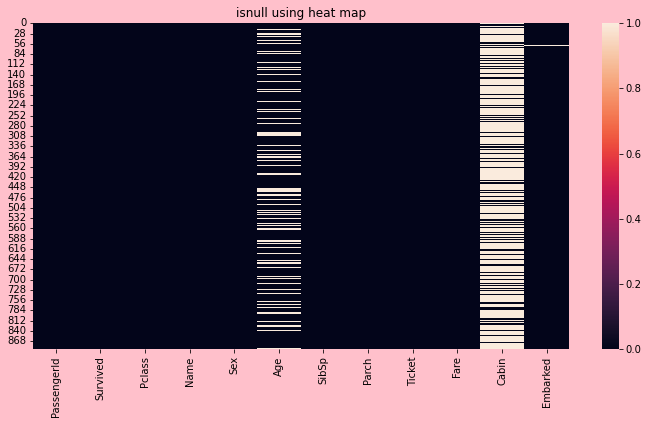

In [10]:
#isnull using heat map
plt.rcParams['figure.facecolor']='pink'
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heat map')
plt.show()

* observations
1. Dataframe has 891 rows and 12 columns.
2. There are null values present in Age ,Cabin and Embarked coulumns of the dataframe.
3. Age column has 177 null, Cabin column has 687 null and Embarked column has 2 null values.
4. In the heat map there are lines present in Age, Cabin and Embarked columns which shows null values.

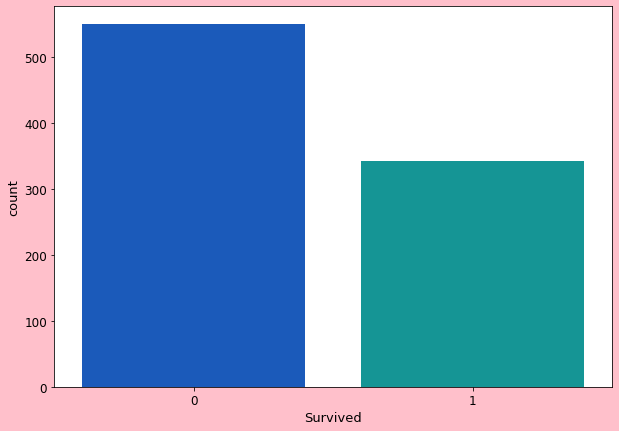

In [11]:
#countplot for survived
plt.rcParams['figure.figsize']=(10,7)
sns.countplot(df['Survived'],palette='winter')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Survived',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

In [12]:
#value count for survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above we can see that there are 549 people who did not survived and 342 people survived.The data shows that the people who didnot survived are more compared to the people who survived. 

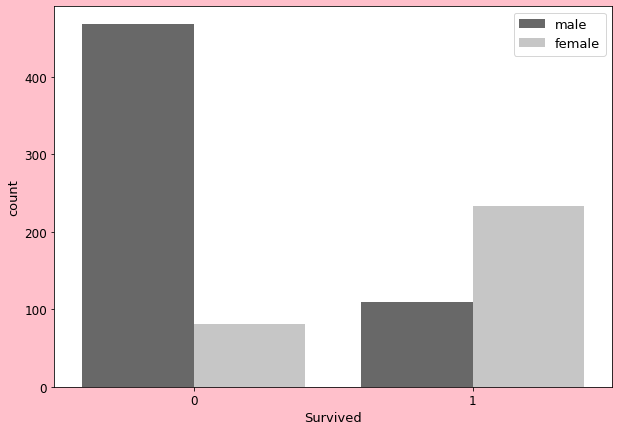

In [13]:
#countplot for survived and sex
sns.countplot(df['Survived'],hue=df['Sex'],palette='Greys_r')
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Survived',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

There were more Male passengers who didnot survived and more female passengers who survived and only few females didnot survived.

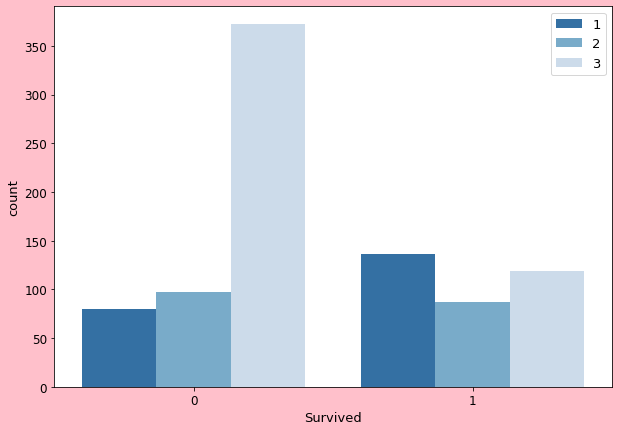

In [14]:
#countplot for survived and Pclass
sns.countplot(df['Survived'],hue=df['Pclass'],palette='Blues_r')
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Survived',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

1. Majoity of passengers were from Pclass3
2. The passengers who were in pclass 3 are less survived compared to other class and majority survived class is Pclass 1.

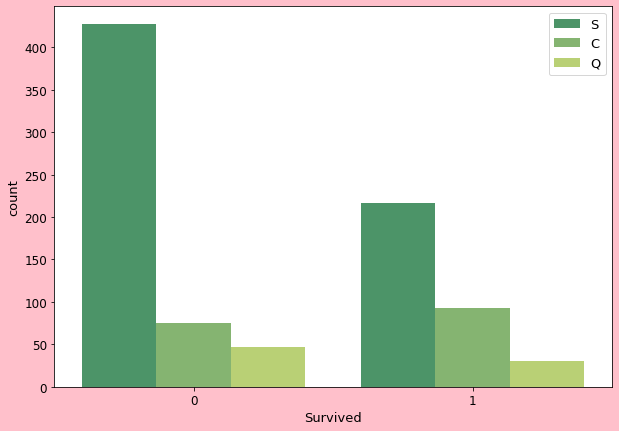

In [15]:
#countplot for survived and embarked
sns.countplot(df['Survived'],hue=df['Embarked'],palette='summer')
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Survived',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

Majority passengers are from S embarked and least are from Q embarked.
The passengers who were from S embarked didnot survived the most.

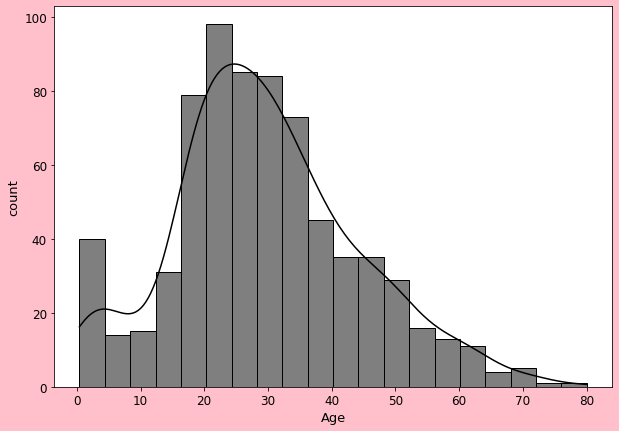

In [16]:
#distribution of age using displot
sns.histplot(df['Age'],kde=True, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

The passengers were from the age 1 to 80 years old and majority of passengers were of age between 10 to 40 years old.

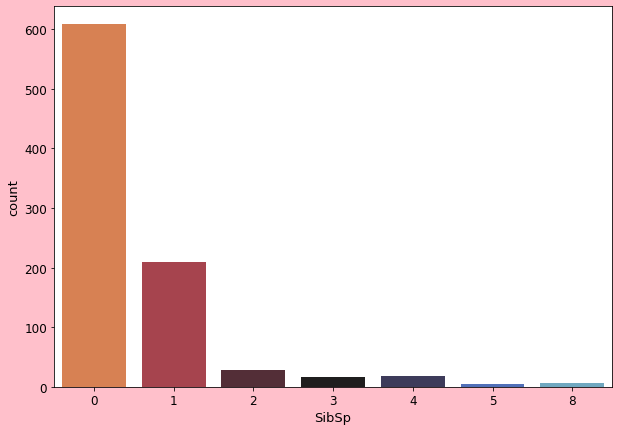

In [17]:
#histogram for siblings count
sns.countplot(df['SibSp'],palette='icefire_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('SibSp',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

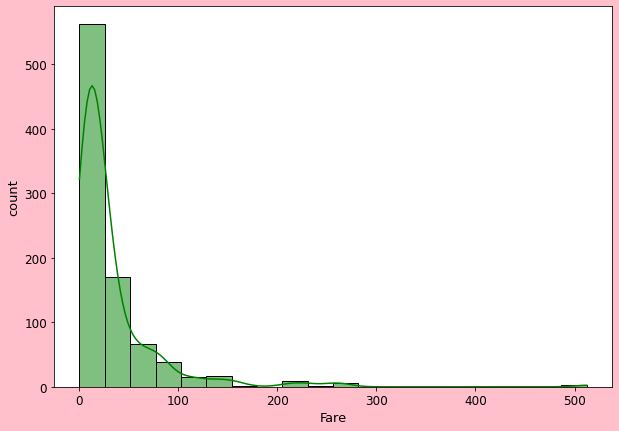

In [18]:
#distribution of age using displot
sns.histplot(df['Fare'],kde=True,bins=20,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Fare',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

# Correlation

In [19]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


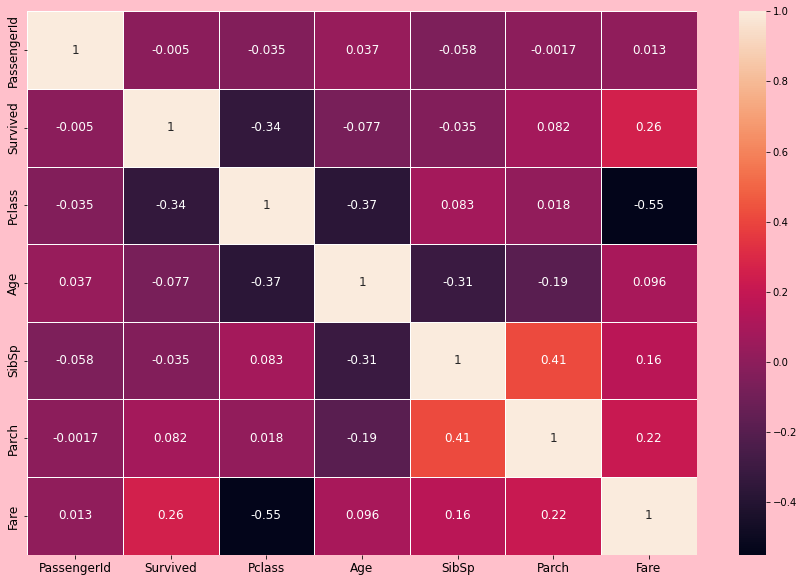

In [20]:
#df.corr() using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth='1',linecolor='white',annot=True, annot_kws={"size":12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Describing dataset

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# checking outliers

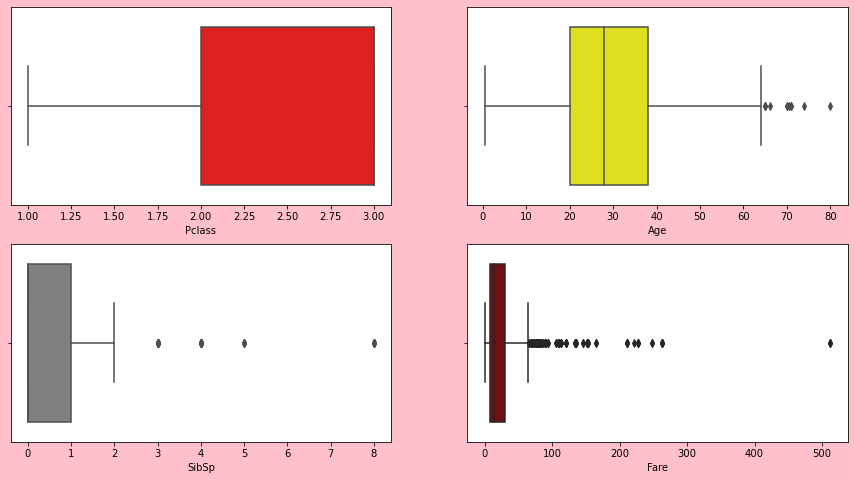

In [22]:
#vizualizing outliers
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1) # row 2, col 2 index 1
sns.boxplot(df['Pclass'],color='red')

plt.subplot(2, 2, 2) # row 2, col 2 index 2
sns.boxplot(df['Age'], color='yellow')

plt.subplot(2, 2, 3) # row 2, col 2 index 3
sns.boxplot(df['SibSp'], color='grey')

plt.subplot(2, 2, 4) # row 2, col 2 index 4
sns.boxplot(df['Fare'], color='maroon')


plt.show()

# checking skewness

In [23]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

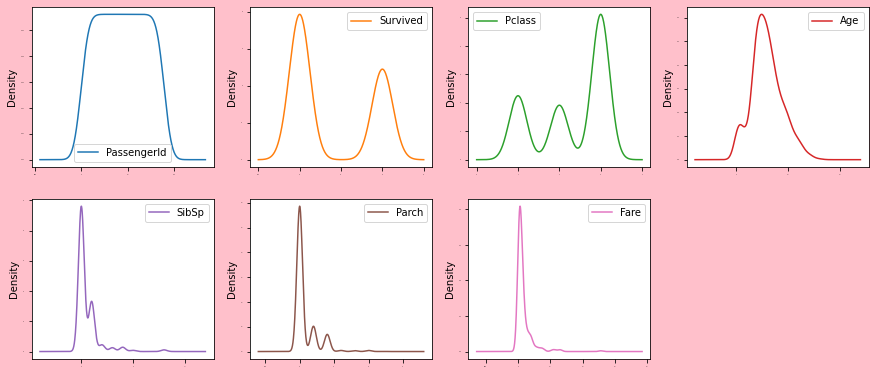

In [24]:
#vizualizing skewness
df.plot(kind='density', subplots=True, layout=(3,4), sharex= False, legend= True, fontsize=1, figsize=(15,10))
plt.show()

Every column has skewness

# Observations from above analysis

1. Dataframe has 891 rows and 12 columns.
2. There are null values present in Age ,Cabin and Embarked coulumns of the dataframe.
3. Age column has 177 null, Cabin column has 687 null and Embarked column has 2 null values.
4. In the heat map there are lines present in Age, Cabin and Embarked columns which shows null values.
5. There are 549 people who did not survived and 342 people survived.The data shows that the people who didnot survived are more compared to the people who survived.
6. There were more Male passengers who didnot survived compared to female passengers who survived and only few female passengers didnot survived.
7. Majoity of passengers were from Pclass3.
8. The passengers who were in pclass 3 are less survived compared to other class and majority survived class is Pclass 1.
9. Majority passengers are from S embarked and least are from Q embarked.
10. The passengers who were from S embarked didnot survived the most.
11. The passengers were from the age 1 to 80 years old and majority of passengers were of age between 10 to 40 years old.
12. Majority of passengers did not had siblings and around 200 passengers had only one sibling.
13. Majority of passengers are of Fare below 100 and only 1 passenger are of Fare 500

# Data Preprocessing

# Handling Null Values

In [25]:
#dropping cabin column which has more null
df.drop('Cabin',inplace=True, axis=1)

#filling age column with its mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

#filling embarked column with most repeated value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [26]:
#checking null
df.isnull().sum()
#as you can see there are no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Label Encoding

in our dataset Sex column and Embarked column are categorical and object type , so to train the model it should be converted into int type

In [27]:
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df['Sex'])
#transforming data
df['Sex']=le.transform(df['Sex'])

le.fit(df['Embarked'])
df['Embarked']=le.transform(df['Embarked'])

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [29]:
#droping unwanted columns
df.drop(['PassengerId','Ticket','Name'],inplace=True, axis=1 )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Removing outliers:

using Zscore technique

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))
z.shape

(891, 8)

In [32]:
threshold = 3   # rule of thumb
#index number
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [33]:
len(np.where(z>3)[0])

72

In [34]:
df_new=df[(z<3).all(axis=1)]
print('old dataframe',df.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df.shape[0]-df_new.shape[0])

old dataframe (891, 8)
new dataframe (820, 8)
no of rows dropped 71


# Splitting data into x(independent) and y(target)

In [35]:
#splitting data into x and y 
x=df_new.drop('Survived', axis=1)
y=df_new['Survived']

In [36]:
x.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
524,3,1,29.699118,0,0,7.2292,0


In [37]:
y.sample()

502    0
Name: Survived, dtype: int64

In [38]:
x=np.array(x)
y=np.array(y)

# Removing skewness

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [40]:
x_df=pd.DataFrame(x)

In [41]:
x_df.skew()

0   -0.429718
1   -0.664152
2    0.071813
3    0.948944
4    1.581505
5   -0.018602
6   -1.073724
dtype: float64

# scaling independent data

using StandardScaler

In [42]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

# Finding Best Random State

In [45]:
from sklearn.linear_model import LogisticRegression
#creating instance 
LR=LogisticRegression()

In [46]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_LR=LR.predict(x_test)
    acc=accuracy_score(y_test,pred_LR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8048780487804879 random_state 1
Accuracy 0.8170731707317073 random_state 4
Accuracy 0.8658536585365854 random_state 14
Accuracy 0.8719512195121951 random_state 201


from the above we can see that the best random state is 201

# Model building with best random state

In [47]:
#creating train , test split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=201)

#creating instance 
LR=LogisticRegression()

#traing data
LR.fit(x_train1,y_train1)

#predicting data
LR_pred=LR.predict(x_test1)

# Evaluation

In [48]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test1,LR_pred))
#print confusion matrics
print(confusion_matrix(y_test1,LR_pred))
#printing classification report
print(classification_report(y_test1,LR_pred))

Accuracy:  0.8719512195121951
[[99  8]
 [13 44]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.85      0.77      0.81        57

    accuracy                           0.87       164
   macro avg       0.87      0.85      0.86       164
weighted avg       0.87      0.87      0.87       164



# Decision Tree Classifier

# Finding Best Random State

In [49]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    DTC=DecisionTreeClassifier() #creating instance 
    DTC.fit(x_train,y_train)  #traing data
    DTC_pred=DTC.predict(x_test) #predicting data.fit(x_train,y_train)
    acc=accuracy_score(y_test,DTC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7804878048780488 random_state 1
Accuracy 0.7865853658536586 random_state 3
Accuracy 0.7987804878048781 random_state 4
Accuracy 0.8292682926829268 random_state 14
Accuracy 0.8658536585365854 random_state 148


from the above we can see that the best random state is 148

# Model building with best random state

In [50]:
#creating train , test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=148)

DTC=DecisionTreeClassifier() #creating instance 
DTC.fit(x_train2,y_train2)  #traing data
DTC_pred=DTC.predict(x_test2) #predicting data

# Evaluation

In [51]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_pred))
#print confusion matrics
print(confusion_matrix(y_test2,DTC_pred))
#printing classification report
print(classification_report(y_test2,DTC_pred))

Accuracy:  0.8597560975609756
[[90 10]
 [13 51]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.84      0.80      0.82        64

    accuracy                           0.86       164
   macro avg       0.85      0.85      0.85       164
weighted avg       0.86      0.86      0.86       164



# Suppport Vector Classifier(SVC)

# Finding Best Random State

In [52]:
from sklearn.svm import SVC

maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc=accuracy_score(y_test,svc_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8292682926829268 random_state 1
Accuracy 0.8658536585365854 random_state 14
Accuracy 0.8963414634146342 random_state 120


From the above we can see that the best random state is 120

# Model building with best random state

In [53]:
#creating train , test split
x_train3,x_test3,y_train3,y_test3=train_test_split(x_scaled,y,test_size=0.20,random_state=120)

#creating instance
svc=SVC()
#training data
svc.fit(x_train3,y_train3)
#predicting data
svc_pred=svc.predict(x_test3)

# Evaluation

In [54]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,svc_pred))
#print confusion matrics
print(confusion_matrix(y_test3,svc_pred))
#printing classification report
print(classification_report(y_test3,svc_pred))

Accuracy:  0.8963414634146342
[[104   6]
 [ 11  43]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       110
           1       0.88      0.80      0.83        54

    accuracy                           0.90       164
   macro avg       0.89      0.87      0.88       164
weighted avg       0.90      0.90      0.89       164



# Gaussian Naive Bayes

# Finding Best Random State

In [55]:
from sklearn.naive_bayes import GaussianNB
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    GNB = GaussianNB()
    GNB.fit(x_train, y_train)
    GNB_pred=GNB.predict(x_test)
    acc=accuracy_score(y_test,GNB_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8170731707317073 random_state 1
Accuracy 0.8597560975609756 random_state 14
Accuracy 0.8780487804878049 random_state 201


From the above we can see that the best random state is 201

# Model building with best random state

In [56]:
#creating train , test split
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=201)

#creating instance
GNB = GaussianNB()

#training data
GNB.fit(x_train4, y_train4)

#predicting data
GNB_pred=GNB.predict(x_test4)

# Evaluation

In [57]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,GNB_pred))
#print confusion matrics
print(confusion_matrix(y_test4,GNB_pred))
#printing classification report
print(classification_report(y_test4,GNB_pred))

Accuracy:  0.8780487804878049
[[95 12]
 [ 8 49]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.80      0.86      0.83        57

    accuracy                           0.88       164
   macro avg       0.86      0.87      0.87       164
weighted avg       0.88      0.88      0.88       164



# cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scr=cross_val_score(LR,x,y,cv=10)
print('cross validation score of LogisticRegression: ',scr.mean())

cross validation score of LogisticRegression:  0.7926829268292683


In [60]:
scr=cross_val_score(DTC,x,y,cv=10)
print('cross validation score of DecissionTreeClassifier: ',scr.mean())

cross validation score of DecissionTreeClassifier:  0.7646341463414634


In [61]:
scr=cross_val_score(svc,x,y,cv=10)
print('cross validation score of SuperVectorClassifier: ',scr.mean())

cross validation score of SuperVectorClassifier:  0.8073170731707318


In [62]:
scr=cross_val_score(GNB,x,y,cv=10)
print('cross validation score of GaussianNB: ',scr.mean())

cross validation score of GaussianNB:  0.7780487804878049


# Hyper parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters= {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
 
GCV= GridSearchCV(svc, parameters, refit = True, verbose = 3)
GCV.fit(x_train3,y_train3)
print(GCV.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.712 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [65]:
GCV.best_estimator_

SVC(C=1000, gamma=0.01)

In [66]:
svc_GCV=SVC(C=1000,gamma=0.01,kernel='rbf')

In [67]:
#train model
svc_GCV.fit(x_train3,y_train3)

#predicting data
svc_GCV_pred=svc_GCV.predict(x_test3)

In [68]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,svc_GCV_pred))
#print confusion matrics
print(confusion_matrix(y_test3,svc_GCV_pred))
#printing classification report
print(classification_report(y_test3,svc_GCV_pred))

Accuracy:  0.8902439024390244
[[104   6]
 [ 12  42]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       110
           1       0.88      0.78      0.82        54

    accuracy                           0.89       164
   macro avg       0.89      0.86      0.87       164
weighted avg       0.89      0.89      0.89       164



In [69]:
#cross validation score of tuned model
scr=cross_val_score(svc_GCV,x,y,cv=10)
print('cross validation score of Tuned SuperVectorClassifier : ',scr.mean())

cross validation score of Tuned SuperVectorClassifier :  0.8036585365853659


# ROC AUC  curve

In [70]:
from sklearn.metrics import plot_roc_curve

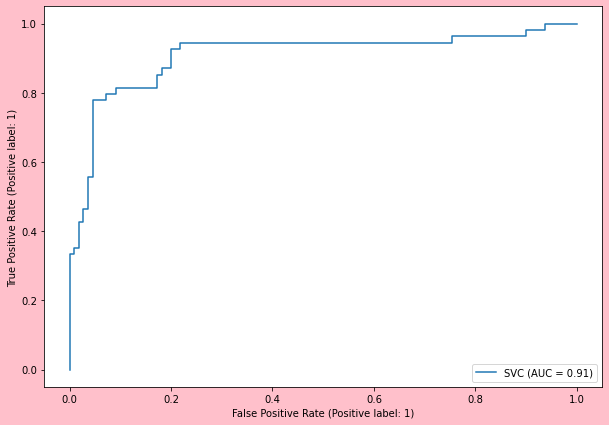

In [71]:
plot_roc_curve(svc_GCV,x_test3,y_test3)
plt.show()

# conclusion

final accuracy is 89 percent and ROC_AUC score is 91

# Model Saving

In [72]:
import pickle

In [73]:
SVC_file='Titanic.pkl'
pickle.dump(svc_GCV,open(SVC_file,'wb'))

# Trying on random data

In [74]:
#independent variables
x_rand_test=np.array([1,1,64.0,0,0,26.0,2])

In [75]:
x_test_reshaped=x_rand_test.reshape(1,-1)

In [76]:
survival_pred=svc_GCV.predict(x_test_reshaped)

In [77]:
print(survival_pred)

[0]


In [78]:
if survival_pred[0]!=1:
    print('didnot survived')
else:
    print('survived')

didnot survived
